### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read Cities.csv into dataframe
f = open('/content/drive/MyDrive/Google Colab/Machine Learning Using Python/Copy of Cities.csv')
cities = pd.read_csv(f)

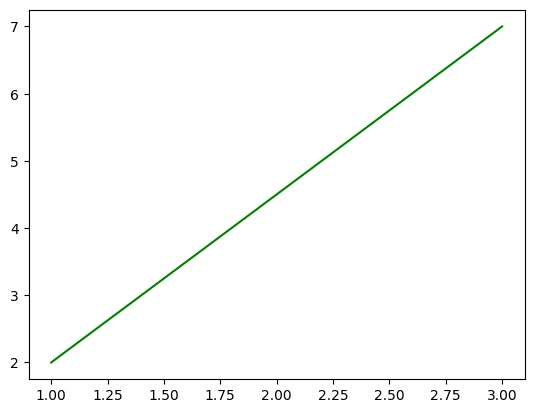

In [ ]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

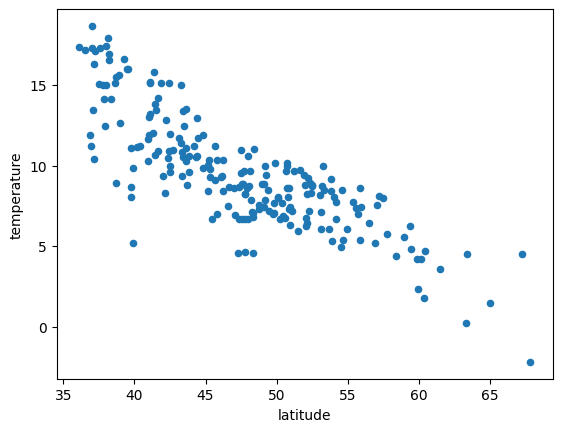

In [ ]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

36.13 67.85
14.455335919508546 0.6248119710527149


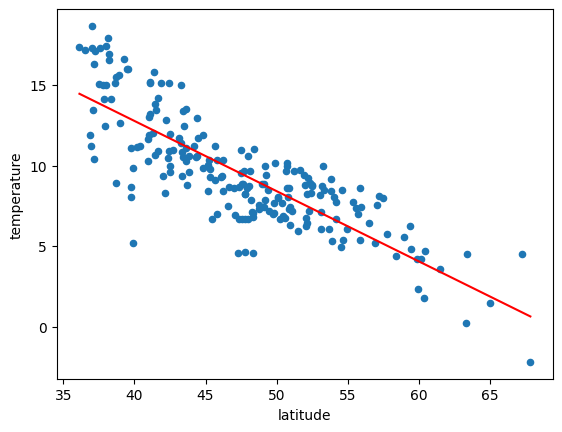

In [ ]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)

print(x1,x2)
print(a*x1 + b, a*x2 + b)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)
r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


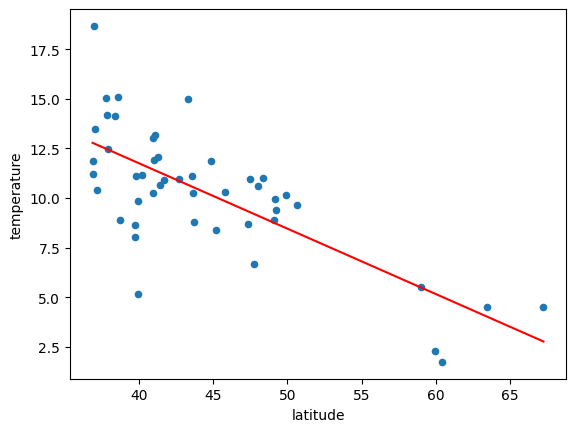

In [ ]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
a,b = np.polyfit(train.latitude, train.temperature, 1)
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b)
        print('Actual temperature:', float(city.temperature))

### <font color="green">**Your Turn: World Cup Data**</font>

In [6]:
# Read Players.csv into dataframe
f = open('/content/drive/MyDrive/Google Colab/Machine Learning Using Python/Copy of Players.csv')
players = pd.read_csv(f)

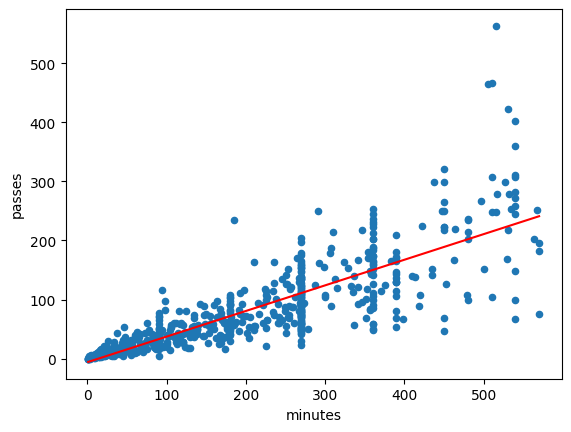

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter('minutes', 'passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b

x1 = min(players.minutes)
x2 = max(players.minutes)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
r = np.corrcoef(players.minutes, players.passes)[1,0]
print('Correlation coefficient for passes versus minutes:', r)
r = np.corrcoef(players.minutes, players.tackles)[1,0]
print('Correlation coefficient for tackles versus minutes:', r)
r = np.corrcoef(players.minutes, players.shots)[1,0]
print('Correlation coefficient for shots versus minutes:', r)
r = np.corrcoef(players.minutes, players.saves)[1,0]
print('Correlation coefficient for saves versus minutes:', r)


Correlation coefficient for passes versus minutes: 0.8151193157954871
Correlation coefficient for tackles versus minutes: 0.6106734613835504
Correlation coefficient for shots versus minutes: 0.40792307740541656
Correlation coefficient for saves versus minutes: 0.22847723253087998


In [7]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
for pos in ['forward','midfielder','defender','goalkeeper']:
  print('Position', pos, '-')
  p = players[players.position==pos]
  r = np.corrcoef(p.minutes, p.passes)[1,0]
  print('  Correlation coefficient for passes versus minutes:', r)
  r = np.corrcoef(p.minutes, p.tackles)[1,0]
  print('  Correlation coefficient for tackles versus minutes:', r)
  r = np.corrcoef(p.minutes, p.shots)[1,0]
  print('  Correlation coefficient for shots versus minutes:', r)
  if pos == 'goalkeeper':
    r = np.corrcoef(p.minutes, p.saves)[1,0]
    print('  Correlation coefficient for saves versus minutes:', r)

Position forward -
  Correlation coefficient for passes versus minutes: 0.8878879513279622
  Correlation coefficient for tackles versus minutes: 0.5747089226547138
  Correlation coefficient for shots versus minutes: 0.8481803964835185
Position midfielder -
  Correlation coefficient for passes versus minutes: 0.865429580683516
  Correlation coefficient for tackles versus minutes: 0.7793091396604376
  Correlation coefficient for shots versus minutes: 0.5360369284446229
Position defender -
  Correlation coefficient for passes versus minutes: 0.891885240439449
  Correlation coefficient for tackles versus minutes: 0.6959873475487464
  Correlation coefficient for shots versus minutes: 0.3623603154015943
Position goalkeeper -
  Correlation coefficient for passes versus minutes: 0.8016811641352866
  Correlation coefficient for tackles versus minutes: 0.24793450789982802
  Correlation coefficient for shots versus minutes: -0.18926055771763878
  Correlation coefficient for saves versus minutes: 

Training data:


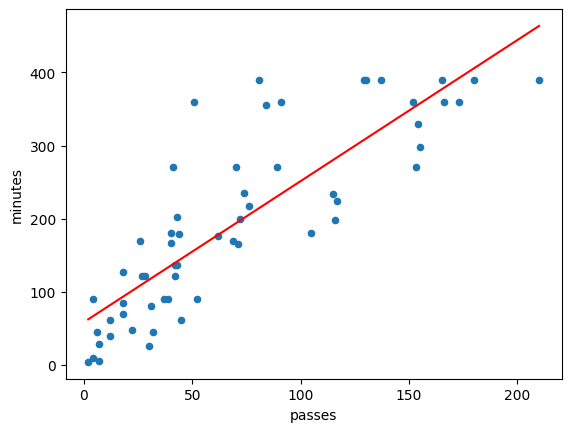

In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
a,b = np.polyfit(train.passes, train.minutes, 1)
print('Training data:')
train.plot.scatter('passes', 'minutes')
x1 = min(train.passes)
x2 = max(train.passes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [16]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
while True:
    name = input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print('Non-unique surname')
    else:
        print('Predicted passes:', a * float(player.minutes) + b)
        print('Actual passes:', int(player.passes))

Enter player name (or "quit" to quit): Kadir


<ipython-input-16-43765521>:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted passes:', a * float(player.minutes) + b)
<ipython-input-16-43765521>:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Actual passes:', int(player.passes))


Predicted passes: 95.41231564728017
Actual passes: 104
Enter player name (or "quit" to quit): quit


In [11]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
Fminutes = train[train.position == 'forward'].minutes
Fpasses = train[train.position == 'forward'].passes
Mminutes = train[train.position == 'midfielder'].minutes
Mpasses = train[train.position == 'midfielder'].passes
Dminutes = train[train.position == 'defender'].minutes
Dpasses = train[train.position == 'defender'].passes
Gminutes = train[train.position == 'goalkeeper'].minutes
Gpasses = train[train.position == 'goalkeeper'].passes

# Compute and show correlation coefficients and regressions
r = np.corrcoef(train.minutes, train.passes)[1,0]
print('Correlation coefficient for one regression:', r)
a,b = np.polyfit(train.minutes, train.passes, 1)
r = np.corrcoef(Fminutes, Fpasses)[1,0]
print('Correlation coefficient for forwards:', r)
Fa,Fb = np.polyfit(Fminutes, Fpasses, 1)
r = np.corrcoef(Mminutes, Mpasses)[1,0]
print('Correlation coefficient for midfielders:', r)
Ma,Mb = np.polyfit(Mminutes, Mpasses, 1)
r = np.corrcoef(Dminutes, Dpasses)[1,0]
print('Correlation coefficient for defenders:', r)
Da,Db = np.polyfit(Dminutes, Dpasses, 1)
r = np.corrcoef(Gminutes, Gpasses)[1,0]
print('Correlation coefficient for goalkeepers:', r)
Ga,Gb = np.polyfit(Gminutes, Gpasses, 1)
# Loop asking user for players, compute predicted + actual passes
while True:
    name = input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    else:
        position = player.iloc[0].position
        print('Player position: ', position)
        if position == 'forward':
            a = Fa
            b = Fb
        elif position == 'midfielder':
            a = Ma
            b = Mb
        elif position == 'defender':
            a = Da
            b = Db
        else:
            a = Ga
            b = Gb
        print('Predicted passes made:', float(a * player.minutes + b))
        print('Actual passes made:', int(player.passes))

Correlation coefficient for one regression: 0.845958847015782
Correlation coefficient for forwards: 0.9111530570739269
Correlation coefficient for midfielders: 0.9521194599674532
Correlation coefficient for defenders: 0.9337411156437279
Correlation coefficient for goalkeepers: 0.8461538461538463
Enter player name (or "quit" to quit): quit
